<a href="https://colab.research.google.com/github/MichaelArgs/Tugas-PenambanganData/blob/main/UTS_Bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KLASIFIKASI SPESIES PINGUIN**

__Tulis Nama dan Nim__

Nama : Michael Argento

NIM : A11.2022.14567

Silahkan buat salinan ke Drive sendiri

`File -> Save copy in drive`

Dalam project kali ini kita akan melakukan klasifikasi menggunakan dataset pinguin

Berikut Link Dataset :  https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **Import library** yang akan digunakan
    - **Membaca dataset** _penguins_size_
    - **Tampilkan 10 sample** dari dataset
    

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [133]:
df = pd.read_csv('penguins_size.csv')

In [134]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE
203,Chinstrap,Dream,51.4,19.0,201.0,3950.0,MALE
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,FEMALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
271,Gentoo,Biscoe,48.5,14.1,220.0,5300.0,MALE
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,MALE
45,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE
323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,MALE
239,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,MALE


2. Isi _code-cell_ dibawah dengan kode untuk:
    - **Mengecek dan menghitung nilai kosong** yang ada pada dataset
    - **Mengecek dan menghitung nilai duplikat** dari dataset
    - **Menghapus nilai kosong dan nilai duplikat** jika ada

In [135]:
print("Missing data di setiap kolom:")
print(df.isnull().sum())

Missing data di setiap kolom:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [136]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [137]:
print("\nJumlah Duplikat:", df.duplicated().sum())


Jumlah Duplikat: 0


In [138]:
df_cleaned = df.dropna().drop_duplicates()

3. Isi _code-cell_ dibawah dengan kode untuk:
    - **Melihat informasi** pada dataset
    - **Mengecek nilai unik** pada kolom bertipe data *object*
  

In [139]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [140]:
for column in df.select_dtypes(include='object').columns:
    print(f"Nilai unik pada kolom {column}:")
    print(df[column].unique())
    print()

Nilai unik pada kolom species:
['Adelie' 'Chinstrap' 'Gentoo']

Nilai unik pada kolom island:
['Torgersen' 'Biscoe' 'Dream']

Nilai unik pada kolom sex:
['MALE' 'FEMALE' nan '.']



4. Isi _code-cell_ dibawah dengan kode untuk:
    - **Menghitung jumlah value** dalam kolom *sex*
    - **Menghapus kolom *sex* dengan value "."**
    - **Cek apakah kolom sudah terhapus dengan benar** dari dataset


In [141]:
print(df_cleaned['sex'].value_counts())

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


<span style="color: red;">***output yang diharapkan*** :</span>

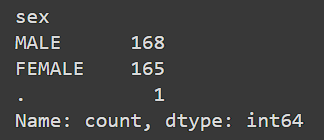

In [142]:
df_cleaned = df_cleaned[df_cleaned['sex'] != "."]

In [143]:
print(df_cleaned['sex'].value_counts())

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


Output yang diharapkan :

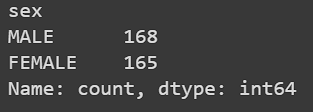

5. Isi _code-cell_ dibawah dengan kode untuk:
    - **Tampilkan apa saja isi dari kolom**

        a. *species*

        b. *island*
        
        c. *sex*

In [144]:
print(df_cleaned['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


output yang diharapkan :      

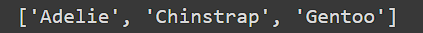

In [145]:
print(df_cleaned['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


output yang diharapkan :      

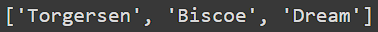

In [146]:
print(df_cleaned['sex'].unique())

['MALE' 'FEMALE']


output yang diharapkan :      

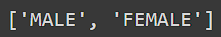

6. Isi _code-cell_ dibawah dengan kode untuk:
    - **Ubah label _species, island dan sex_** menjadi angka
    - **Masukkan hasil labelling** kedalam dataset


In [147]:
kamusSpesies = {str(TARGET): INDEX for INDEX, TARGET in enumerate(df_cleaned['species'].unique())}
kamusIsland = {str(TARGET): INDEX for INDEX, TARGET in enumerate(df_cleaned['island'].unique())}
kamusSex = {str(TARGET): INDEX for INDEX, TARGET in enumerate(df_cleaned['sex'].unique())}

print(kamusSpesies)
print(kamusIsland)
print(kamusSex)

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
{'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
{'MALE': 0, 'FEMALE': 1}


output yang diharapkan :      

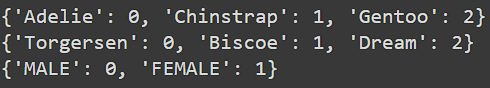

In [148]:
df_cleaned['species'] = df_cleaned['species'].map(kamusSpesies)
df_cleaned['island'] = df_cleaned['island'].map(kamusIsland)
df_cleaned['sex'] = df_cleaned['sex'].map(kamusSex)

indices = [243, 30, 298, 171]
selected_data = df_cleaned.loc[indices]
print(selected_data[['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']])

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
243        2       1              46.3             15.8              215.0   
30         0       2              39.5             16.7              178.0   
298        2       1              45.2             13.8              215.0   
171        1       2              49.2             18.2              195.0   

     body_mass_g  sex  
243       5050.0    0  
30        3250.0    1  
298       4750.0    1  
171       4400.0    0  


__Expected Output dari cell di-atas__

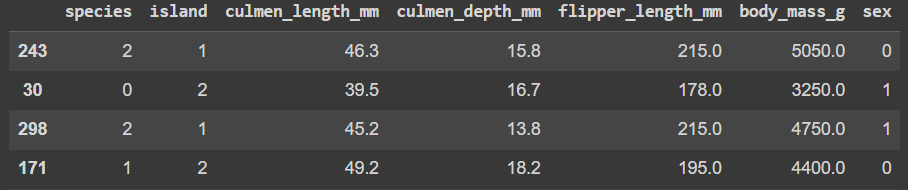

## **VISUALISASI**

7. Isi _code-cell_ dibawah dengan kode untuk:
    - **Buatlah bar plot dari kolom spesies**
    - **Buatlah heatmap** untuk korelasi antar fitur
  

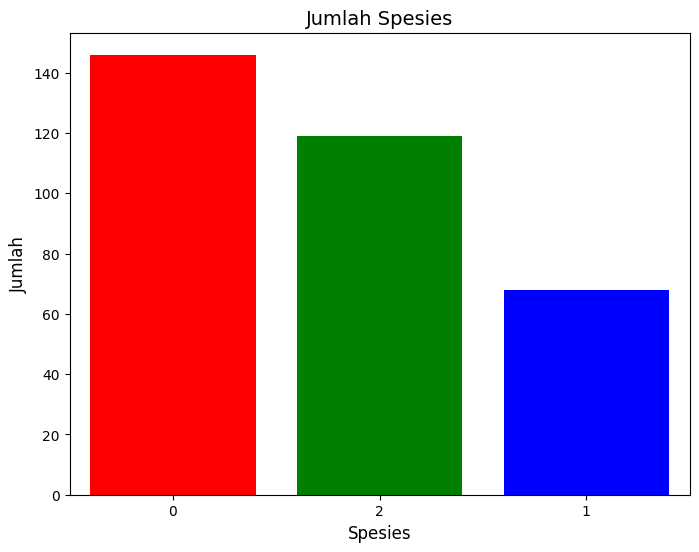

In [149]:
species_counts = df_cleaned['species'].value_counts()

plot_order = [0, 2, 1]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=species_counts.index, y=species_counts.values, order=plot_order)

colors = ['red', 'green', 'blue']

for bar, color in zip(barplot.patches, colors):
    bar.set_facecolor(color)

plt.xlabel('Spesies', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('Jumlah Spesies', fontsize=14)

plt.show()


__Expected Output dari Cell di atas__

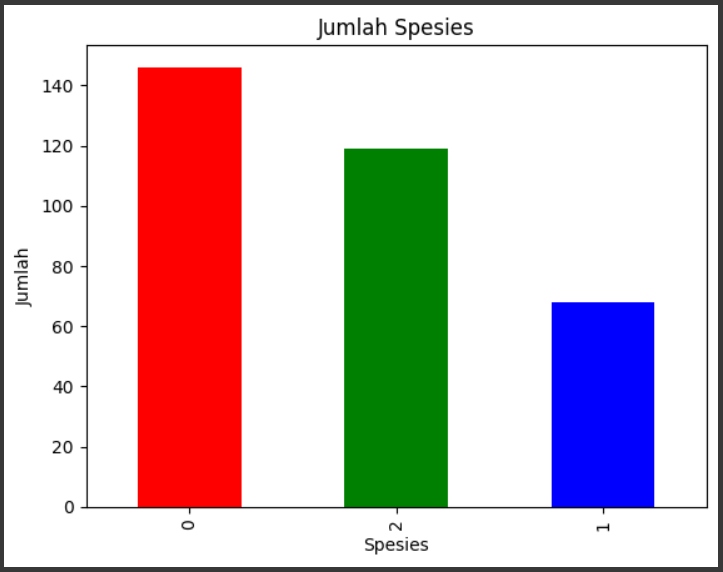

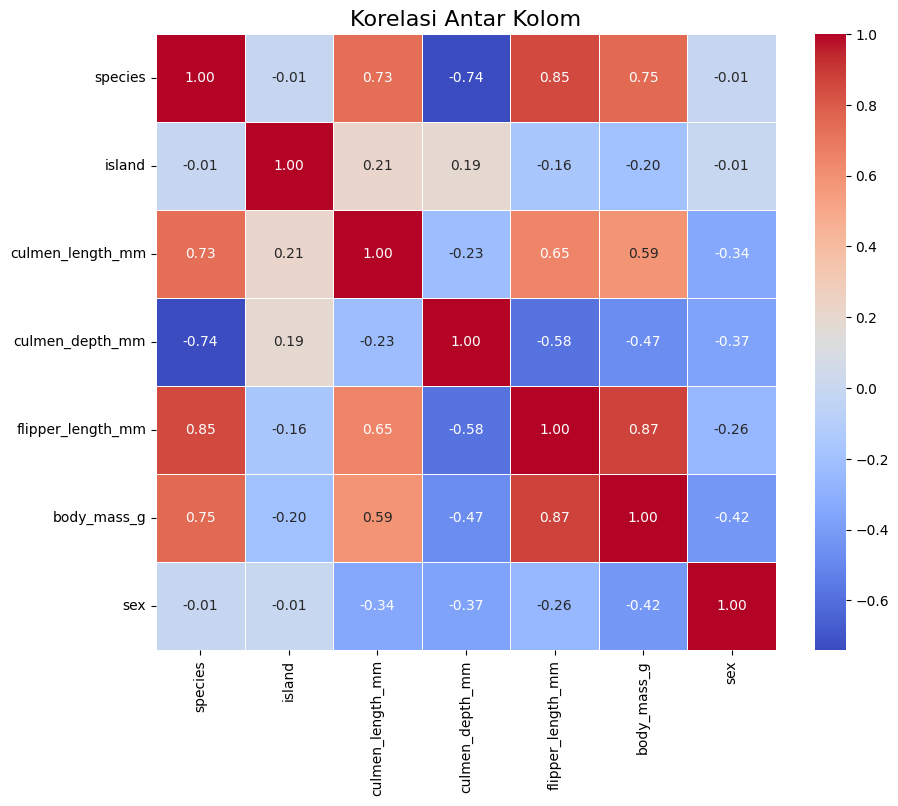

In [150]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Korelasi Antar Kolom', fontsize=16)

plt.show()

__Expected Output dari Cell di Atas__

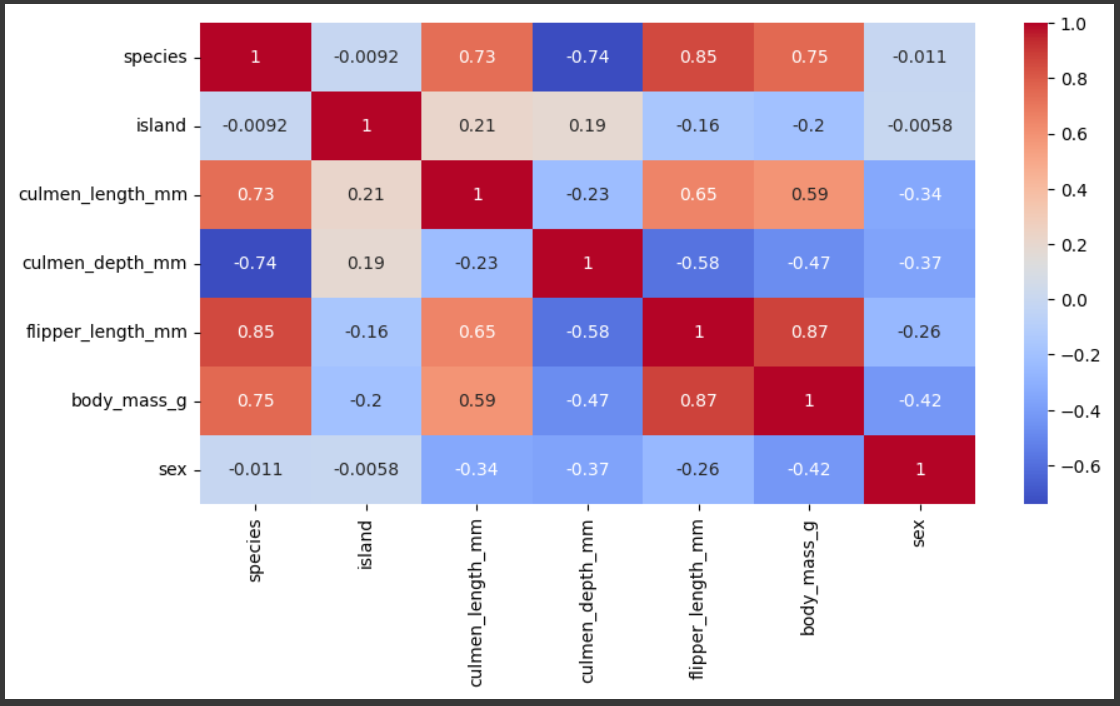

## **FUNCTION YANG BOLEH DIGUNAKAN JIKA MAU**

In [151]:
# Function
def trainSemua(x_train, y_train):
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    nb = GaussianNB()
    knn.fit(x_train, y_train)
    dt.fit(x_train, y_train)
    nb.fit(x_train, y_train)
    return knn, dt, nb

def predikSemua(knn, dt, nb, x_test, y_test):
    knnPred = knn.predict(x_test)
    dtPred = dt.predict(x_test)
    nbPred = nb.predict(x_test)
    knnAcc = accuracy_score(y_test, knnPred)
    dtAcc = accuracy_score(y_test, dtPred)
    nbAcc = accuracy_score(y_test, nbPred)
    return knnAcc, dtAcc, nbAcc

## **MODELLING**

8. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_


In [152]:
X = df_cleaned.drop(columns=['species'])
y = df_cleaned['species']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

9. Buatlah perbandingan model menggunakan algoritma **klasifikasi** antara 2 data yaitu

    a. Data yang di  **NORMALISASI**

    b. Data yang  **BELUM DI NORMALISASI**

    kemudian tampilkan hasil akurasi dari dua dataset tersebut

In [154]:
# Cell berikut untuk data yang belum diNormalisasi
# Boleh mengikuti arahan berikut atau menggunakan cara sendiri

In [155]:
knn, dt, nb = trainSemua(X_train, y_train)

In [156]:
knnAcc, dtAcc, nbAcc = predikSemua(knn, dt, nb, X_test, y_test)

In [157]:
print("Akurasi KNN (belum dinormalisasi):", knnAcc)
print("Akurasi Decision Tree (belum dinormalisasi):", dtAcc)
print("Akurasi Naive Bayes (belum dinormalisasi):", nbAcc)

Akurasi KNN (belum dinormalisasi): 0.79
Akurasi Decision Tree (belum dinormalisasi): 0.99
Akurasi Naive Bayes (belum dinormalisasi): 0.97


In [158]:
# Deklarasi Scaler dan scale fitur
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [159]:
# Split ulang menjadi train dan test sesuai rasio yang disebutkan.
# Kali ini menggunakan fitur X yang sudah dinormalisasi
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [160]:
# Cell berikut untuk data yang sudah diNormalisasi
# Boleh mengikuti arahan berikut atau menggunakan cara sendiri

In [161]:
knnN, dtN, nbN = trainSemua(X_trainN, y_trainN)

In [162]:
knnAccN, dtAccN, nbAccN = predikSemua(knnN, dtN, nbN, X_testN, y_testN)

In [163]:
print("Akurasi KNN (sudah dinormalisasi):", knnAccN)
print("Akurasi Decision Tree (sudah dinormalisasi):", dtAccN)
print("Akurasi Naive Bayes (sudah dinormalisasi):", nbAccN)

Akurasi KNN (sudah dinormalisasi): 0.98
Akurasi Decision Tree (sudah dinormalisasi): 0.98
Akurasi Naive Bayes (sudah dinormalisasi): 0.84


##**EVALUASI**

10. Berikan kesimpulan dari project yang telah anda buat


In [164]:
# Silahkan komentari dari visualisasi hingga hasil model

# **1.Heatmap Korelasi Antar Kolom**
• species memiliki korelasi positif yang tinggi dengan flipper_length_mm (0.85) dan body_mass_g (0.75), serta korelasi negatif dengan culmen_depth_mm (-0.74).

•	culmen_length_mm dan body_mass_g juga memiliki korelasi positif yang cukup kuat (0.59), yang menunjukkan bahwa panjang culmen dan massa tubuh mungkin berkaitan.

•	flipper_length_mm memiliki korelasi positif yang tinggi dengan body_mass_g (0.87), menunjukkan bahwa semakin panjang sirip, semakin tinggi pula massa tubuh.


# **2. Pemodelan dan Evaluasi Akurasi**

Tiga algoritma klasifikasi diterapkan pada kedua dataset (belum dinormalisasi dan dinormalisasi):

**•	KNN (K-Nearest Neighbors)**

**•	Decision Tree**

**•	Naive Bayes**

Akurasi Tanpa Normalisasi:

**•	KNN: 0.79**

**•	Decision Tree: 0.99**

**•	Naive Bayes: 0.97**

Akurasi Dengan Normalisasi :

**•	KNN: 0.98**

**•	Decision Tree: 0.99**

**•	Naive Bayes: 0.84**


# **3. Kesimpulan**
**•	Efek Normalisasi:** Normalisasi memiliki dampak yang signifikan pada KNN, meningkatkan akurasinya dari 0.79 menjadi 0.98. Hal ini menunjukkan bahwa KNN sensitif terhadap skala fitur, sehingga normalisasi bermanfaat bagi model ini.

**•	Stabilitas Decision Tree:** Algoritma Decision Tree menunjukkan akurasi yang konsisten pada kedua versi data (0.99), mengindikasikan bahwa metode ini kurang terpengaruh oleh skala data.

**•	Penurunan Akurasi Naive Bayes:** Naive Bayes mengalami penurunan akurasi setelah data dinormalisasi (dari 0.97 menjadi 0.84). Hal ini bisa terjadi karena Naive Bayes bekerja dengan asumsi distribusi tertentu yang dapat terganggu oleh perubahan skala fitur.
